In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
corn_data = './Data/Corn/'

image_size = (224,224)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


input_shape = (224,224,3)
batch_size = 16


train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = .2,
    height_shift_range = .2,
    shear_range = .2,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],
    featurewise_center=True,
    featurewise_std_normalization=True,
    fill_mode = 'nearest',
    validation_split = 0.3
)

train_generator = train_datagen.flow_from_directory(
    corn_data,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    corn_data,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

test_generator = train_datagen.flow_from_directory(
    corn_data,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False,
    subset = 'validation'
)

Found 2934 images belonging to 4 classes.
Found 1254 images belonging to 4 classes.
Found 1254 images belonging to 4 classes.


In [4]:
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, BatchNormalization, GlobalAveragePooling2D

In [5]:
def mobilenetv2():
  
  mobilenet_m = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=input_shape,
                                                               include_top = False,
                                                               weights = 'imagenet'
                                                               )
  x = mobilenet_m.trainable = False
  x = mobilenet_m.output

  x = GlobalAveragePooling2D()(x)
  out = Dense(4,activation='softmax')(x)
  
  model = Model(inputs = mobilenet_m.inputs, outputs = out)

  model.summary() 

  return model

In [6]:
mobilenetv2_model = mobilenetv2()
mobilenetv2_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = .0001),metrics = ['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

C:\Users\yerem\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
epochs_1 = 50
history_1 = mobilenetv2_model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                               epochs=epochs_1, validation_data=(validation_generator), 
                               validation_steps=validation_generator.samples // batch_size
                                    )

C:\Users\yerem\AppData\Roaming\Python\Python310\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\yerem\AppData\Roaming\Python\Python310\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50
183/183 [==============================] - 105s 524ms/step - loss: 0.9117 - accuracy: 0.6429 - val_loss: 0.7267 - val_accuracy: 0.7204
Epoch 2/50
183/183 [==============================] - 62s 337ms/step - loss: 0.6195 - accuracy: 0.7632 - val_loss: 0.6269 - val_accuracy: 0.7636
Epoch 3/50
183/183 [==============================] - 62s 338ms/step - loss: 0.5547 - accuracy: 0.7814 - val_loss: 0.5699 - val_accuracy: 0.7596
Epoch 4/50
183/183 [==============================] - 61s 335ms/step - loss: 0.5044 - accuracy: 0.7988 - val_loss: 0.5492 - val_accuracy: 0.7740
Epoch 5/50
183/183 [==============================] - 61s 335ms/step - loss: 0.4831 - accuracy: 0.8029 - val_loss: 0.5272 - val_accuracy: 0.7764
Epoch 6/50
183/183 [==============================] - 62s 337ms/step - loss: 0.4748 - accuracy: 0.8036 - val_loss: 0.5130 - val_accuracy: 0.7925
Epoch 7/50
183/183 [==============================] - 61s 333ms/step - loss: 0.4445 - accuracy: 0.8225 - val_loss: 0.5073 - val_a

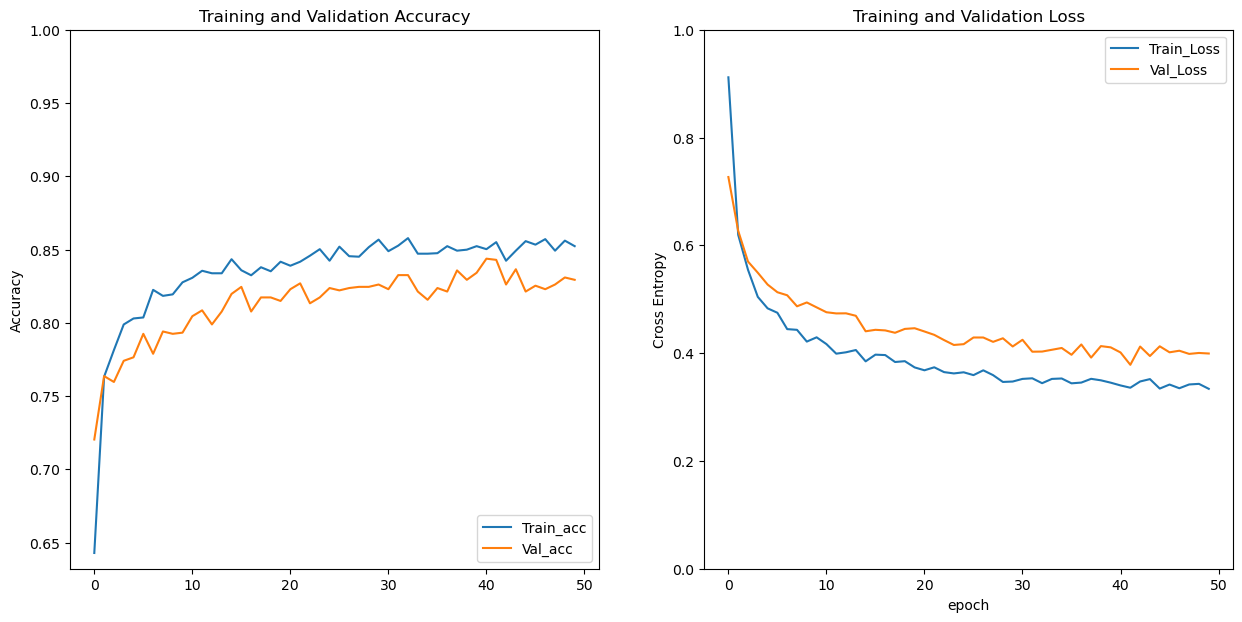

In [8]:
### Loss and accuracy plot
acc_mob = history_1.history['accuracy']
val_acc_mob = history_1.history['val_accuracy']

loss_mob = history_1.history['loss']
val_loss_mob = history_1.history['val_loss']

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(acc_mob, label='Train_acc')
plt.plot(val_acc_mob, label='Val_acc')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss_mob, label='Train_Loss')
plt.plot(val_loss_mob, label='Val_Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [10]:
result_eval = mobilenetv2_model.evaluate(test_generator, verbose =0)

for metric, eval in zip(mobilenetv2_model.metrics_names, result_eval):
  print(metric + ': {:.3}'.format(eval))

C:\Users\yerem\AppData\Roaming\Python\Python310\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\yerem\AppData\Roaming\Python\Python310\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


loss: 0.399
accuracy: 0.833


In [11]:
## Unfreezing layers
mobilenetv2_model.trainable = True


## Fine-tuning
## number of layer in the pre-trained model
print('Number of layer in the pre-trained model:{}'.format(len(mobilenetv2_model.layers)))
fine_tune_at = 100

for layer in mobilenetv2_model.layers[:fine_tune_at]:
  layer.trainable = False
print(f"Trainable Layers: {len(mobilenetv2_model.trainable_variables)}")

Number of layer in the pre-trained model:156
Trainable Layers: 56


In [12]:
mobilenetv2_model.summary()
mobilenetv2_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.0001/10),metrics = ['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

C:\Users\yerem\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
## Training
fine_tune_epochs = 25
total_epochs = epochs_1 + fine_tune_epochs

history_fine = mobilenetv2_model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                                            epochs=total_epochs,
                                            initial_epoch = history_1.epoch[-1], 
                                            validation_data=(validation_generator), 
                                            validation_steps=validation_generator.samples // batch_size,
                                    )

C:\Users\yerem\AppData\Roaming\Python\Python310\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\yerem\AppData\Roaming\Python\Python310\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 50/75
183/183 [==============================] - 70s 350ms/step - loss: 1.9325 - accuracy: 0.5665 - val_loss: 0.5464 - val_accuracy: 0.7500
Epoch 51/75
183/183 [==============================] - 61s 334ms/step - loss: 0.5075 - accuracy: 0.7906 - val_loss: 0.5425 - val_accuracy: 0.7548
Epoch 52/75
183/183 [==============================] - 61s 332ms/step - loss: 0.4499 - accuracy: 0.8132 - val_loss: 0.5280 - val_accuracy: 0.7748
Epoch 53/75
183/183 [==============================] - 62s 340ms/step - loss: 0.4198 - accuracy: 0.8317 - val_loss: 0.5496 - val_accuracy: 0.7668
Epoch 54/75
183/183 [==============================] - 63s 343ms/step - loss: 0.4091 - accuracy: 0.8280 - val_loss: 0.4990 - val_accuracy: 0.7933
Epoch 55/75
183/183 [==============================] - 62s 336ms/step - loss: 0.3956 - accuracy: 0.8345 - val_loss: 0.4768 - val_accuracy: 0.8045
Epoch 56/75
183/183 [==============================] - 62s 336ms/step - loss: 0.3957 - accuracy: 0.8362 - val_loss: 0.4764 -

In [14]:
acc_mob += history_fine.history['accuracy']
val_acc_mob += history_fine.history['val_accuracy']

loss_mob += history_fine.history['loss']
val_loss_mob += history_fine.history['val_loss']

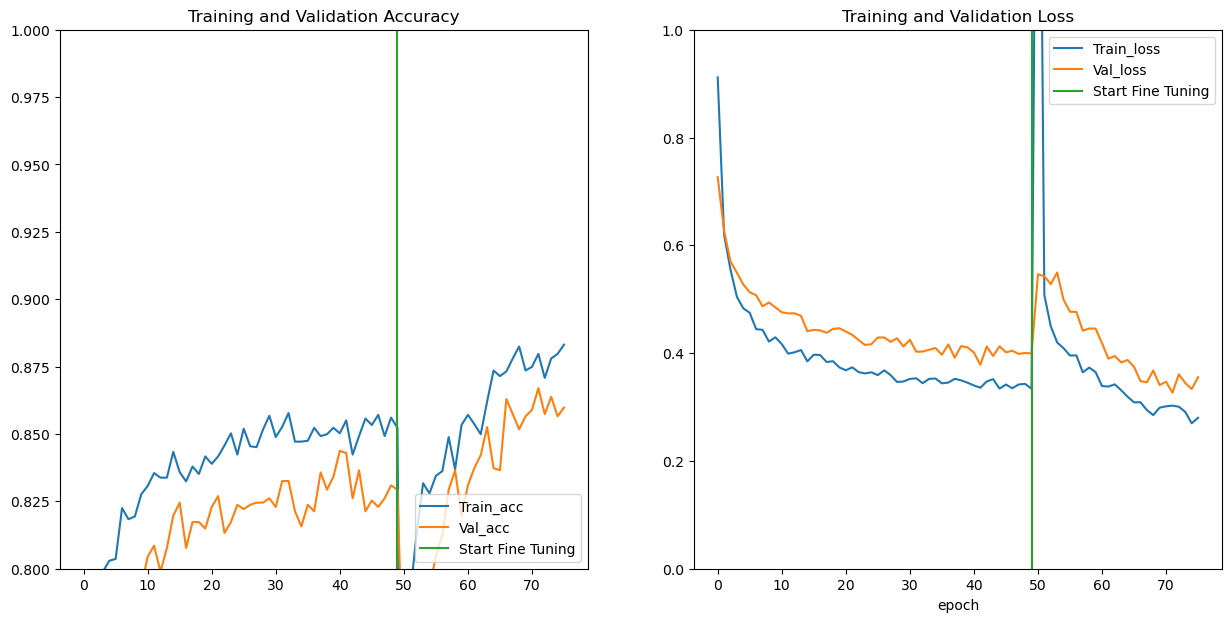

In [15]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(acc_mob, label='Train_acc')
plt.plot(val_acc_mob, label='Val_acc')
plt.ylim([0.8, 1])
plt.plot([epochs_1-1,epochs_1-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss_mob, label='Train_loss')
plt.plot(val_loss_mob, label='Val_loss')
plt.ylim([0, 1.0])
plt.plot([epochs_1-1,epochs_1-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [16]:
result_eval_f = mobilenetv2_model.evaluate(test_generator, verbose =0)

for metric_, eval_ in zip(mobilenetv2_model.metrics_names, result_eval_f):
  print(metric_ + ': {:.3}'.format(eval_))

loss: 0.339
accuracy: 0.857


In [17]:
mobilenetv2_model.save('corn_models_terbaru.h5')

In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
# Load and preprocess the input image
img = image.load_img('./Data/Corn/Gray_Leaf_Spot/Corn_Gray_Spot (80).JPG', target_size=(224, 224))
x = image.img_to_array(img)
x = preprocess_input(x)
x = tf.expand_dims(x, axis=0)

# Make the prediction
preds = mobilenetv2_model.predict(x)

# Interpret the prediction
predicted_class = tf.argmax(preds, axis=1)
confidence = tf.reduce_max(preds)

print('Predicted class:', predicted_class)
print('Confidence:', confidence)

NameError: name 'tf' is not defined